You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.
The original dataset is available at
(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,

In [1]:
import pandas as pd

In [19]:
train = pd.read_csv('trainKNN.txt',header=None)
test  = pd.read_csv('testKNN.txt', header=None)

In [20]:
train.shape, test.shape

((196, 11), (18, 11))

In [21]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
train[:][[1,2]].head()

,1,2
0,1.52101,13.64
1,1.51761,13.89
2,1.51618,13.53
3,1.51766,13.21
4,1.51742,13.27


In [29]:
train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [30]:
train.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
train.corr()[10]

0     0.876191
1    -0.166670
2     0.484154
3    -0.714713
4     0.640944
5     0.092812
6     0.029423
7    -0.019545
8     0.566769
9    -0.227560
10    1.000000
Name: 10, dtype: float64

In [ ]:
# Coulmn 5,6,7 are the least important for this classification task

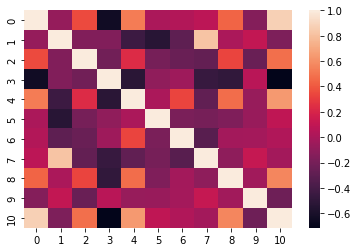

In [36]:
sns.heatmap(train.corr());

In [42]:
X_train = train[:][[1,2,3,4,8,9]]
X_test  = test[:][[1,2,3,4,8,9]]
y_train = train[:][10]
y_test  = test[:][10]

X_train.shape, y_train.shape

((196, 6), (196,))

In [43]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [50]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("Test Accuracy Scores for different values of neighbours:")
for neighbor in range(2,15,1):
  model = KNeighborsClassifier(n_neighbors=neighbor)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("N:",neighbor,'Accuracy:', accuracy_score(y_test,y_pred))

Test Accuracy Scores for different values of neighbours:
N: 2 Accuracy: 0.4444444444444444
N: 3 Accuracy: 0.5555555555555556
N: 4 Accuracy: 0.6111111111111112
N: 5 Accuracy: 0.6111111111111112
N: 6 Accuracy: 0.5555555555555556
N: 7 Accuracy: 0.6111111111111112
N: 8 Accuracy: 0.6666666666666666
N: 9 Accuracy: 0.6111111111111112
N: 10 Accuracy: 0.5
N: 11 Accuracy: 0.5555555555555556
N: 12 Accuracy: 0.5555555555555556
N: 13 Accuracy: 0.5555555555555556
N: 14 Accuracy: 0.5555555555555556


In [48]:
# Accuracy Score is maximum for Neighbours = 8

In [54]:
# Accuracy for different Distance Metrics
print("Test Accuracy Scores for different distance methods:")
dist_method = ["euclidean", "manhattan", "cityblock","cosine","l1","l2"]
for dist in dist_method:
  model = KNeighborsClassifier(n_neighbors=8,metric=dist)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Dist Metric:",dist,', Accuracy:', accuracy_score(y_test,y_pred))

Test Accuracy Scores for different distance methods:
Dist Metric: euclidean , Accuracy: 0.6666666666666666
Dist Metric: manhattan , Accuracy: 0.5555555555555556
Dist Metric: cityblock , Accuracy: 0.5555555555555556
Dist Metric: cosine , Accuracy: 0.5
Dist Metric: l1 , Accuracy: 0.5555555555555556
Dist Metric: l2 , Accuracy: 0.6666666666666666


In [55]:
# Accuracy score is highest for the square Euclidean, l2 distance methods